In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
datos1 = pd.read_excel('unido_eaza_spp_zaa_buen_formato_2.xlsx')
datos2 = pd.read_excel('nombres_especies_pdfgenerales_buen_formato_2.xlsx')

In [ ]:
conteo_programa

Asociacion_Programa
SPP     298
ASMP     98
EEP      98
Name: count, dtype: int64

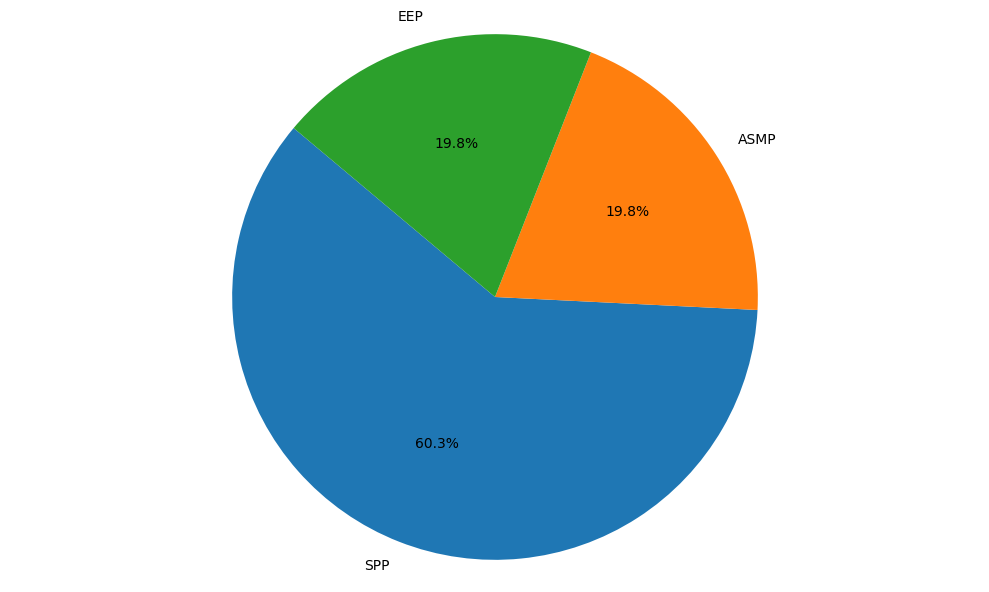

In [ ]:

plt.figure(figsize=(10, 6))
conteo_programa = datos1['Asociacion_Programa'].value_counts()
plt.pie(conteo_programa, labels=conteo_programa.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show()

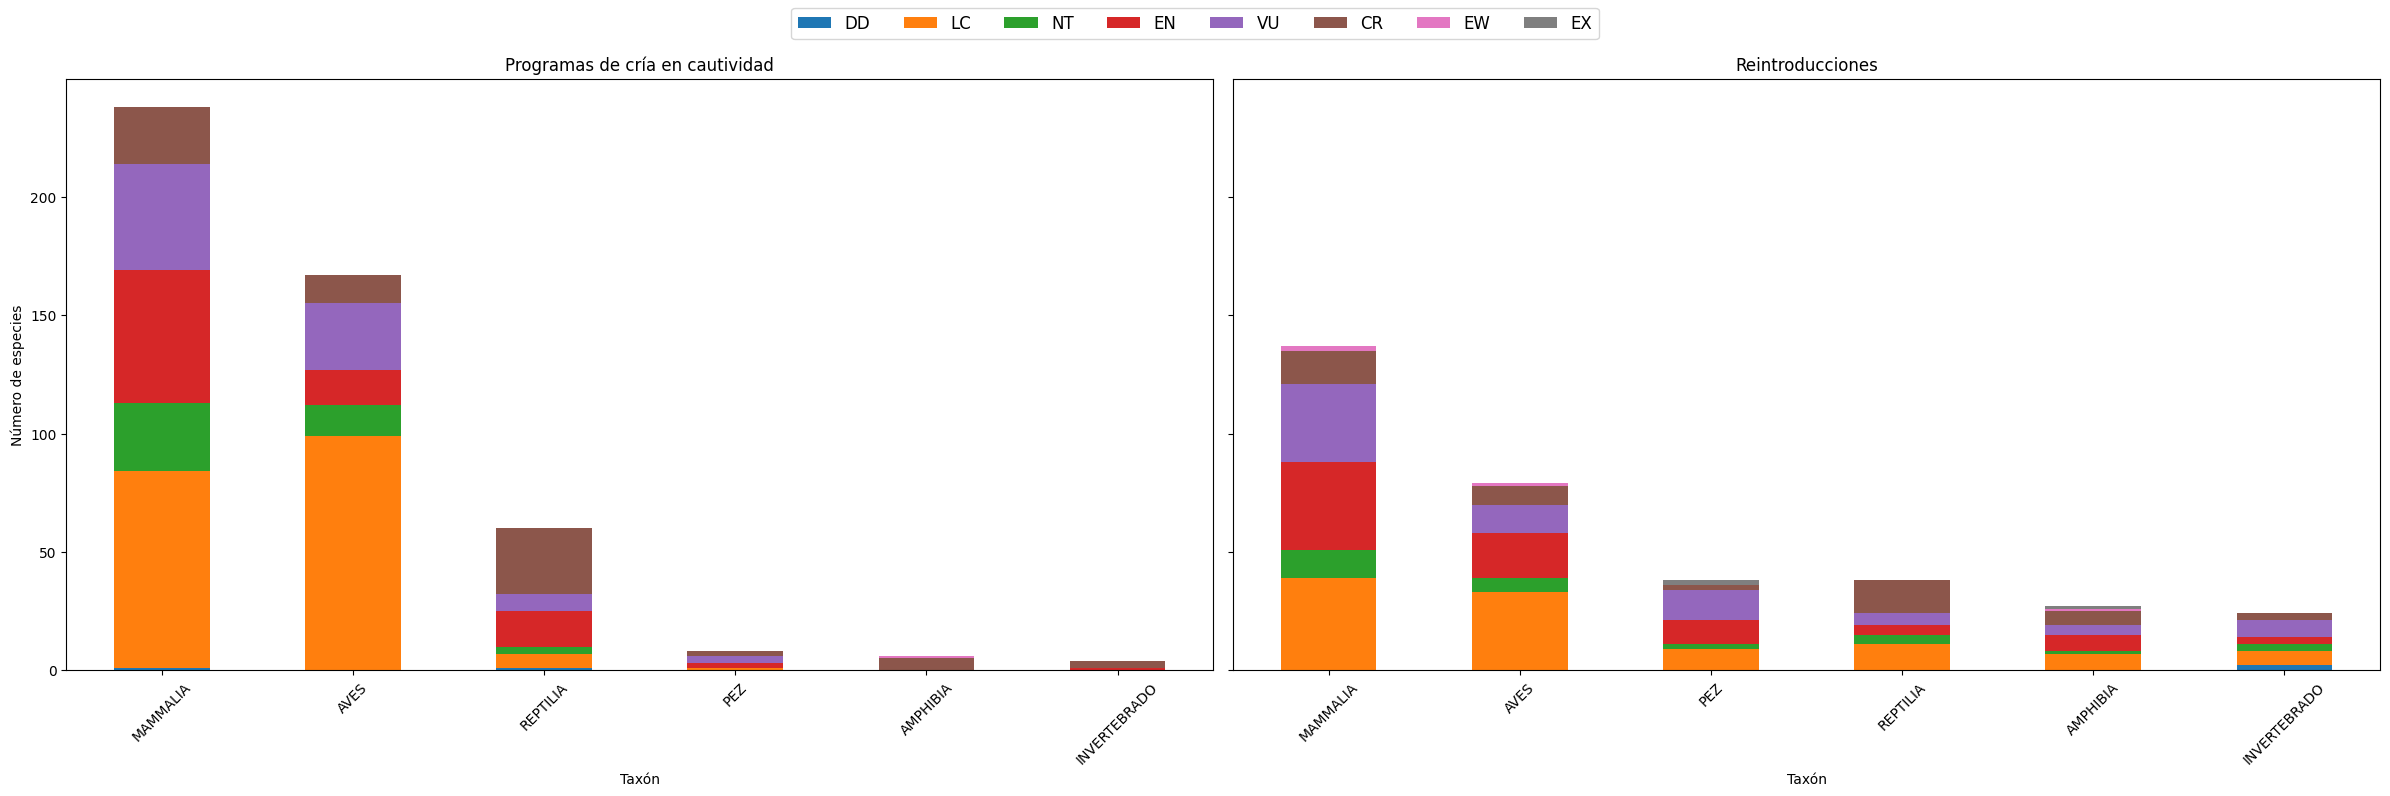

In [ ]:
all_states = ['DD', 'LC', 'NT', 'EN', 'VU', 'CR', 'EW', 'EX']

state_colors = {
    'DD': '#1f77b4',
    'LC': '#ff7f0e',
    'NT': '#2ca02c',
    'EN': '#d62728',
    'VU': '#9467bd',
    'CR': '#8c564b',
    'EW': '#e377c2',
    'EX': '#7f7f7f'
}

def plot_bar_chart(ax, datos, state_colors, all_states, title):
    datos_filtrados = datos[datos['Estado_Conservacion'] != 'LR/cd']
    df = datos_filtrados.groupby(['Taxa_agrupado', 'Estado_Conservacion']).size().unstack(fill_value=0)
    df['Total'] = df.sum(axis=1)
    df = df.sort_values(by='Total', ascending=False)
    df = df.drop(columns='Total')

    for state in all_states:
        if state not in df.columns:
            df[state] = 0

    df = df[all_states]

    df.plot(kind='bar', stacked=True, color=[state_colors[state] for state in all_states], ax=ax)

    ax.set_title(title)
    ax.set_xlabel('Taxón')
    ax.set_ylabel('Número de especies')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8), sharey=True)

plot_bar_chart(ax1, datos1, state_colors, all_states, 'Programas de cría en cautividad')
plot_bar_chart(ax2, datos2, state_colors, all_states, 'Reintroducciones')

handles, labels = ax1.get_legend_handles_labels()
ordered_handles_labels = sorted(zip(handles, labels), key=lambda x: all_states.index(x[1]))
handles, labels = zip(*ordered_handles_labels)
fig.legend(handles, labels, loc='upper center', fontsize='large', ncol=len(all_states))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




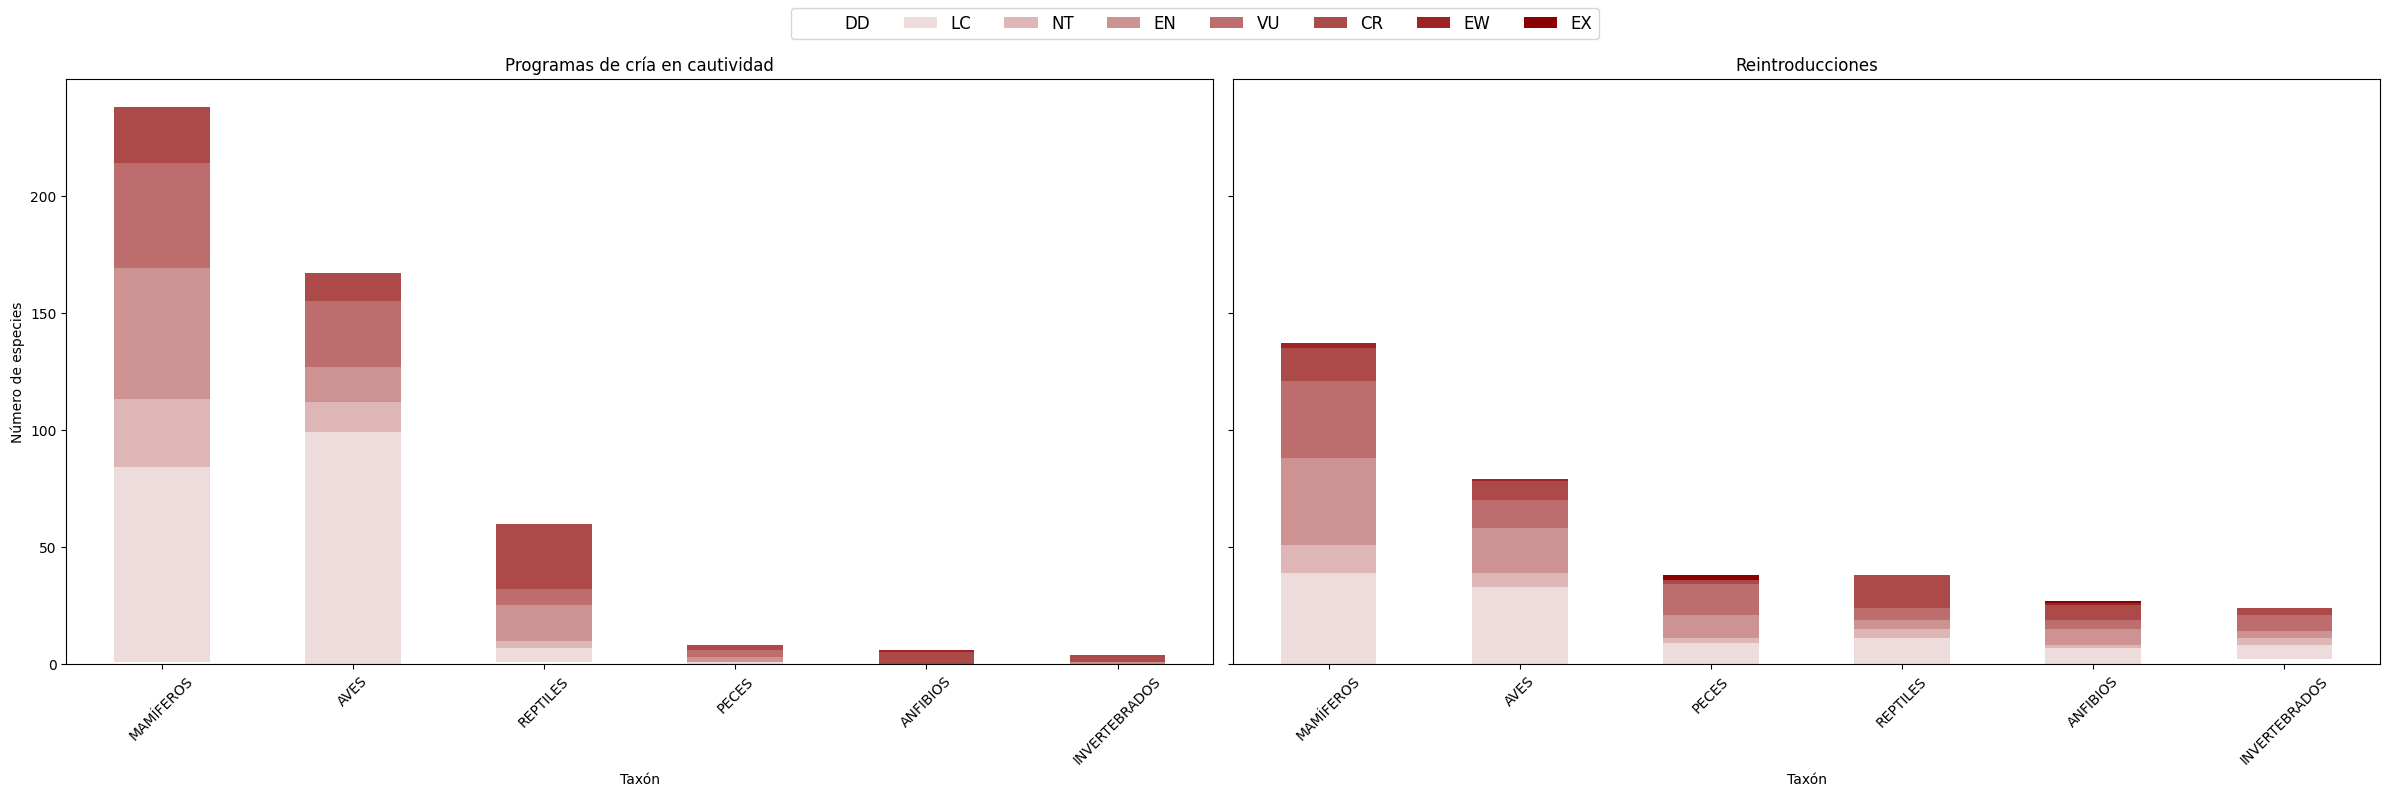

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("custom_red", ["#ffffff", "#8b0000"], N=len(all_states))
state_colors = {state: cmap(i / (len(all_states) - 1)) for i, state in enumerate(all_states)}

def plot_bar_chart(ax, datos, state_colors, all_states, title):
    datos_filtrados = datos[datos['Estado_Conservacion'] != 'LR/cd']
    df = datos_filtrados.groupby(['Taxa_agrupado', 'Estado_Conservacion']).size().unstack(fill_value=0)
    df['Total'] = df.sum(axis=1)
    df = df.sort_values(by='Total', ascending=False)
    df = df.drop(columns='Total')

    for state in all_states:
        if state not in df.columns:
            df[state] = 0

    df = df[all_states]

    df.plot(kind='bar', stacked=True, color=[state_colors[state] for state in all_states], ax=ax)

    ax.set_title(title)
    ax.set_xlabel('Taxón')
    ax.set_ylabel('Número de especies')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8), sharey=True)

plot_bar_chart(ax1, datos1, state_colors, all_states, 'Programas de cría en cautividad')
plot_bar_chart(ax2, datos2, state_colors, all_states, 'Reintroducciones')
handles, labels = ax1.get_legend_handles_labels()
ordered_handles_labels = sorted(zip(handles, labels), key=lambda x: all_states.index(x[1]))
handles, labels = zip(*ordered_handles_labels)
fig.legend(handles, labels, loc='upper center', fontsize='large', ncol=len(all_states))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<Figure size 1200x800 with 0 Axes>

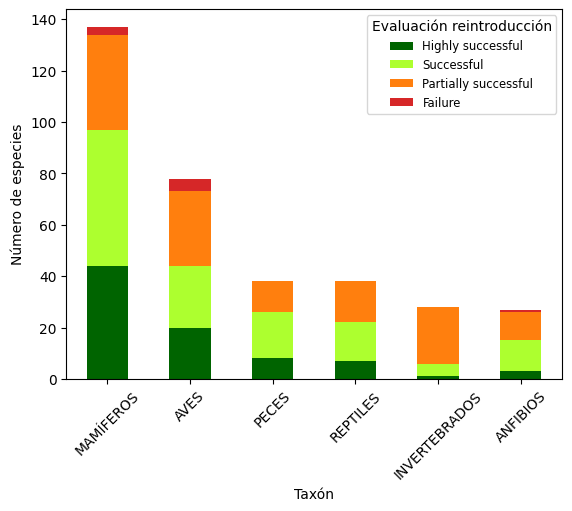

In [ ]:

f = datos2.groupby(['Taxa_agrupado', 'evaluacion_reintroduccion']).size().unstack(fill_value=0)
f['Total'] = f.sum(axis=1)
f = f.sort_values(by='Total', ascending=False)
f = f.drop(columns='Total')

colors = ['#006400', '#ADFF2F', '#ff7f0e', '#d62728']
legend_labels = ['Highly successful', 'Successful', 'Partially successful', 'Failure']

plt.figure(figsize=(12, 8))
ax = f.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Taxón')
plt.ylabel('Número de especies')
plt.xticks(rotation=45)
plt.legend(title='Evaluación reintroducción', fontsize='small', labels=legend_labels)

plt.show()






In [ ]:
df1

3.3,1.0
Taxa_agrupado,
MAMMALIA,39
AVES,14
PEZ,0
REPTILIA,15
AMPHIBIA,3
INVERTEBRADO,2


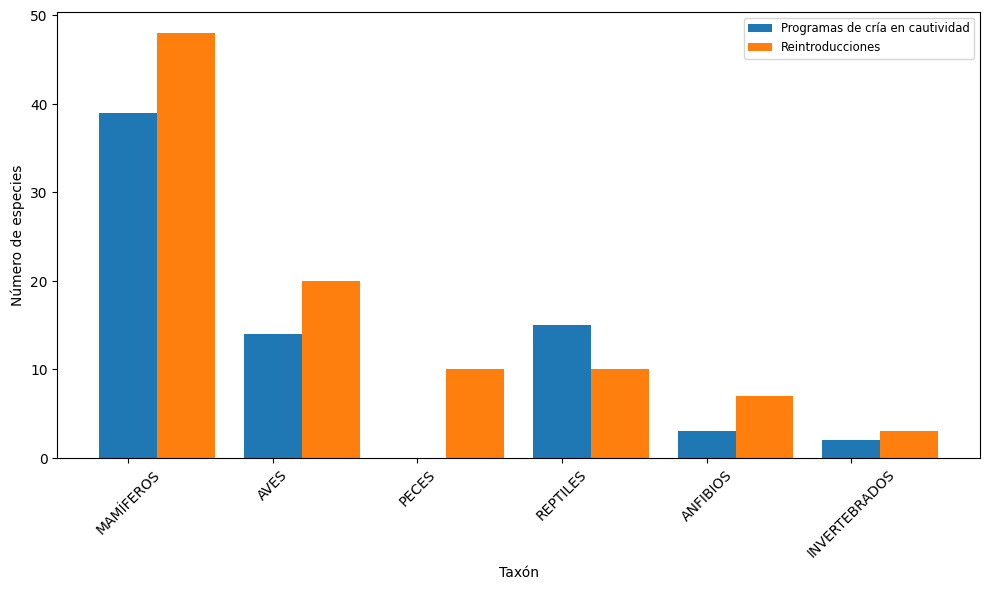

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


orden_categorias = ['MAMÍFEROS', 'AVES', 'PECES', 'REPTILES', 'ANFIBIOS', 'INVERTEBRADOS']

df1 = datos1.groupby('Taxa_agrupado')['3.3'].value_counts().unstack(fill_value=0)
df1['Total'] = df1.sum(axis=1)
df1 = df1.sort_values(by='Total', ascending=False)
df1 = df1.drop(columns='Total')

df2 = datos2.groupby('Taxa_agrupado')['3.3'].value_counts().unstack(fill_value=0)
df2['Total'] = df2.sum(axis=1)
df2 = df2.sort_values(by='Total', ascending=False)
df2 = df2.drop(columns='Total')

df1 = df1.reindex(orden_categorias, fill_value=0)
df2 = df2.reindex(orden_categorias, fill_value=0)

plt.figure(figsize=(10, 6))

bar_width = 0.4
bar_positions1 = range(len(df1))
plt.bar(bar_positions1, df1.iloc[:, 0], width=bar_width, label='Programas de cría en cautividad')

bar_positions2 = [pos + bar_width for pos in bar_positions1]
plt.bar(bar_positions2, df2.iloc[:, 0], width=bar_width, label='Reintroducciones')

plt.xlabel('Taxón')
plt.ylabel('Número de especies')
plt.xticks(bar_positions1, orden_categorias, rotation=45)
plt.legend(fontsize='small')

plt.tight_layout()
plt.show()




<ipython-input-24-2903925b466b>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(variables)).colors  # Obtén suficientes colores únicos


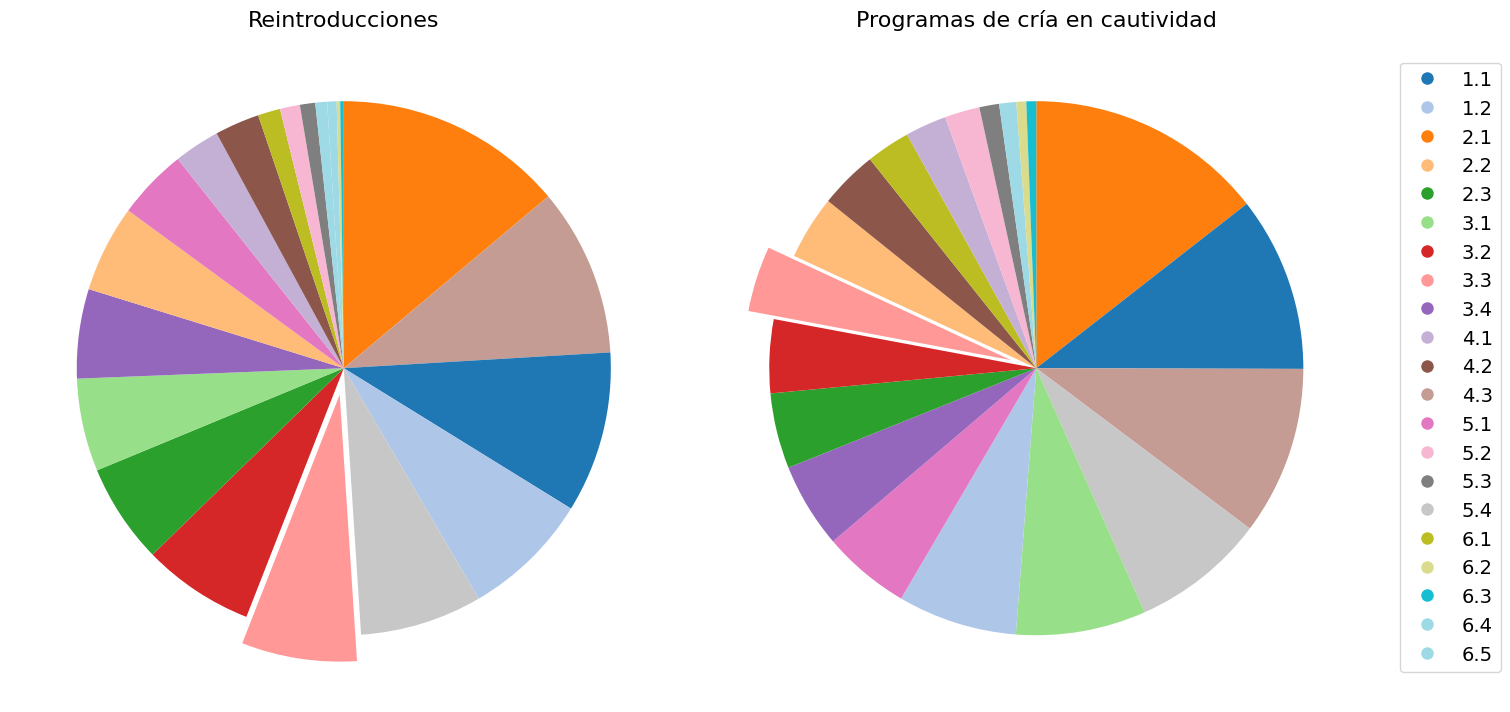

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

columnas_datos2 = datos2.columns[8:-5]
columnas_datos1 = datos1.columns[12:-6]

suma_columnas_datos2 = datos2[columnas_datos2].sum().sort_values(ascending=False)
suma_columnas_datos1 = datos1[columnas_datos1].sum().sort_values(ascending=False)

variables = ['1.1', '1.2', '2.1', '2.2', '2.3', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
             '5.1', '5.2', '5.3', '5.4', '6.1', '6.2', '6.3', '6.4', '6.5']

colors = plt.cm.get_cmap('tab20', len(variables)).colors
color_dict = {variable: colors[i] for i, variable in enumerate(variables)}

def get_colors_for_labels(labels):
    cleaned_labels = [label.strip() for label in labels]
    return [color_dict[label] for label in cleaned_labels]

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(suma_columnas_datos2, startangle=90, counterclock=False,
           explode=[0.1 if label == '3.3' else 0 for label in suma_columnas_datos2.index],
           colors=get_colors_for_labels(suma_columnas_datos2.index),
           textprops=dict(color="w"))
axs[0].set_title('Reintroducciones', fontsize=16)

axs[1].pie(suma_columnas_datos1, startangle=90, counterclock=False,
           explode=[0.1 if label == '3.3' else 0 for label in suma_columnas_datos1.index],
           colors=get_colors_for_labels(suma_columnas_datos1.index),
           textprops=dict(color="w"))
axs[1].set_title('Programas de cría en cautividad', fontsize=16)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[var], markersize=10, label=var) for var in variables]
fig.legend(handles=handles,  loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14, title_fontsize=16)

plt.tight_layout()
plt.show()







<ipython-input-25-258975ce72e8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diez_primeras['Programa_Numeric'] = pd.factorize(diez_primeras['Asociacion_Programa'])[0]
<ipython-input-25-258975ce72e8>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(diez_primeras['Programa_Numeric']))


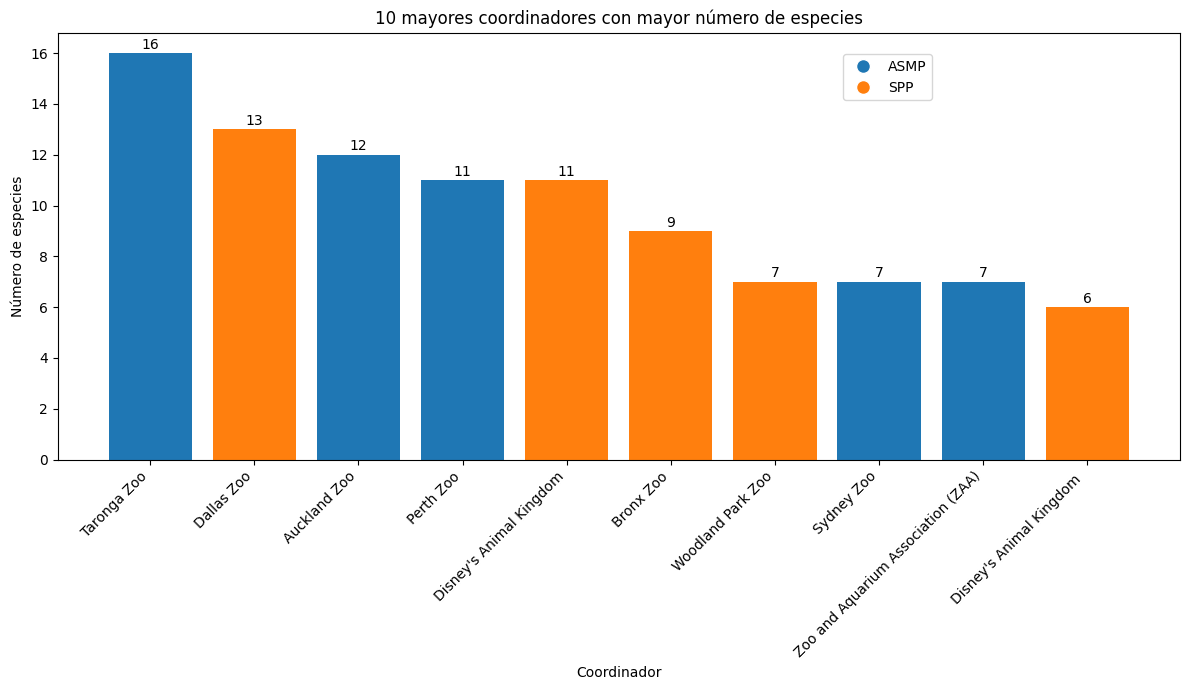

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


conteo_coordinadores = datos1['Coordinador'].value_counts()
conteo_coordinadores_program = datos1.groupby(['Coordinador', 'Asociacion_Programa']).size().reset_index(name='conteo')
conteo_coordinadores2 = conteo_coordinadores_program.sort_values(by='conteo', ascending=False)
conteo_coordinadores2 = conteo_coordinadores2.reset_index(drop=True)

diez_primeras = conteo_coordinadores2.head(10)
diez_primeras['Programa_Numeric'] = pd.factorize(diez_primeras['Asociacion_Programa'])[0]
plt.figure(figsize=(12, 7))
colors = plt.cm.get_cmap('tab10', len(diez_primeras['Programa_Numeric']))
bars = plt.bar(diez_primeras['Coordinador'], diez_primeras['conteo'], color=colors(diez_primeras['Programa_Numeric']))

plt.xlabel('Coordinador')
plt.ylabel('Número de especies')
plt.title('10 mayores coordinadores con mayor número de especies')
plt.xticks(rotation=45, ha='right')

legend_labels = diez_primeras['Asociacion_Programa'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors(i), markersize=10) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(0.7, 0.95), borderaxespad=0.)
for bar, value in zip(bars, diez_primeras['conteo']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()





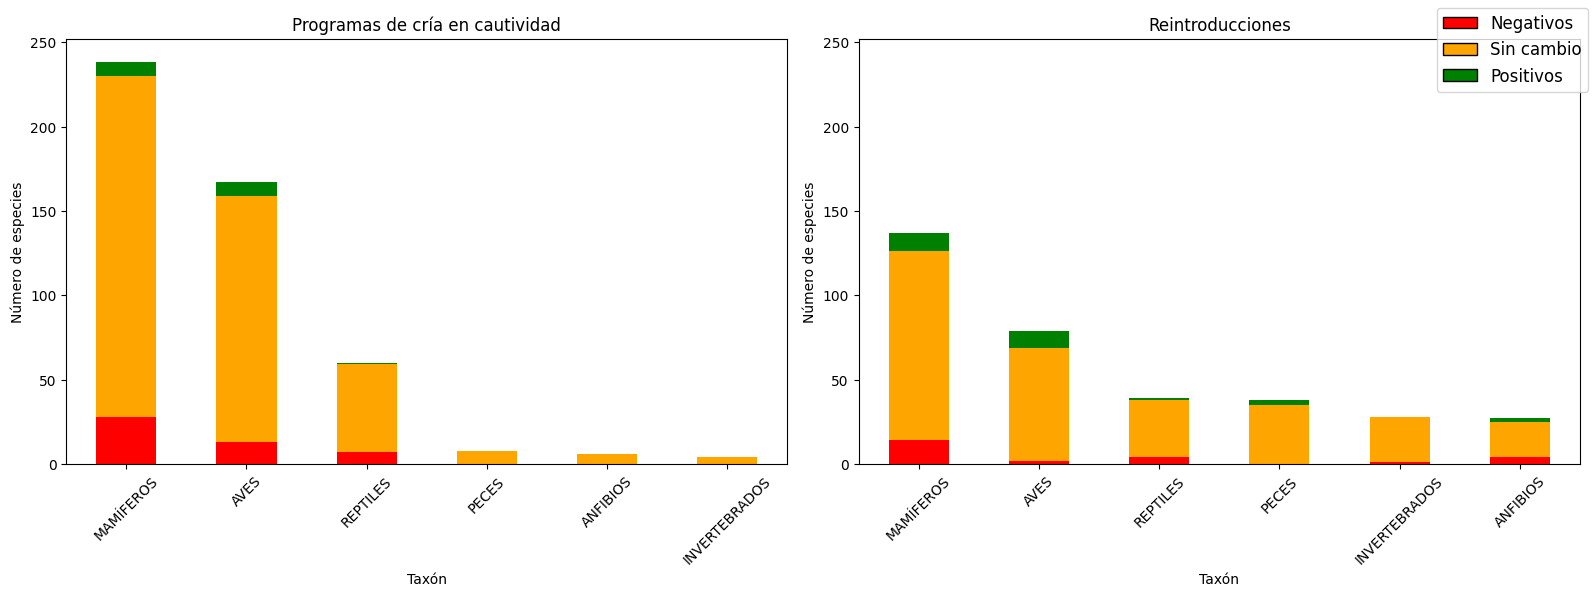

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_bar(df, leyenda_mapeada, ax, titulo):
    df_sum = df.sum(axis=1)
    df_sorted = df_sum.sort_values(ascending=False).index
    df_ordered = df.loc[df_sorted]

    colores = {'Positivos': 'green', 'Negativos': 'red', 'Sin cambio': 'orange'}
    colores_mapped = [colores[leyenda_mapeada[col]] for col in df_ordered.columns]

    df_ordered.plot(kind='bar', stacked=True, ax=ax, color=colores_mapped)

    ax.set_title(titulo)
    ax.set_xlabel('Taxón')
    ax.set_ylabel('Número de especies')
    ax.set_xticklabels(df_ordered.index, rotation=45)

df1 = datos1.groupby(['Taxa_agrupado', 'Mejora']).size().unstack(fill_value=0)
leyenda_mapeada1 = {0: 'Sin cambio', 1: 'Positivos', -1: 'Negativos'}
df2 = datos2.groupby(['Taxa_agrupado', 'mejora']).size().unstack(fill_value=0)
leyenda_mapeada2 = {-1: 'Negativos', 1: 'Positivos', 0: 'Sin cambio'}

leyenda_unica = ['Negativos', 'Sin cambio', 'Positivos']

max_y = max(df1.values.max(), df2.values.max())
df2_sorted = df2.sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_stacked_bar(df1, leyenda_mapeada1, ax1, 'Programas de cría en cautividad')
plot_stacked_bar(df2_sorted, leyenda_mapeada2, ax2, 'Reintroducciones')

handles = [plt.Rectangle((0,0),1,1, color='red', ec="k"),
           plt.Rectangle((0,0),1,1, color='orange', ec="k"),
           plt.Rectangle((0,0),1,1, color='green', ec="k")]
labels = leyenda_unica
fig.legend(handles, labels, fontsize='large', loc='upper right')

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

ax1.set_ylim(0, max_y + 50)
ax2.set_ylim(0, max_y + 50)

plt.tight_layout()
plt.show()



In [ ]:
# DERECHA ASOCIACIONES, IZQUIERDA REINTRODUCCIONES
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

nombres_especies = pd.read_excel('nombres_especies_pdfgenerales_buen_formato_2.xlsx')
unido_eaza_spp_zaa = pd.read_excel('unido_eaza_spp_zaa_buen_formato_2.xlsx')
especies_comunes = nombres_especies[nombres_especies['Nombre_Cientifico'].isin(unido_eaza_spp_zaa['Nombre_Cientifico'])]
especies_comunes = especies_comunes.merge(unido_eaza_spp_zaa[['Nombre_Cientifico', 'Asociacion_Programa']], on='Nombre_Cientifico', how='left')
data_sunburst1 = especies_comunes.groupby(['Asociacion_Programa', 'Taxa_agrupado']).size().reset_index(name='count')
data_sunburst1 = data_sunburst1.sort_values(by=['Asociacion_Programa', 'count'], ascending=[True, False])

data_sunburst2 = datos1.groupby(['Asociacion_Programa', 'Taxa_agrupado']).size().reset_index(name='count')
data_sunburst2 = data_sunburst2.sort_values(by=['Asociacion_Programa', 'count'], ascending=[True, False])

fig1 = px.sunburst(data_sunburst1, path=['Asociacion_Programa', 'Taxa_agrupado'], values='count')
fig1.update_layout(title='Sunburst de especies comunes por Asociación y Taxón')

fig2 = px.sunburst(data_sunburst2, path=['Asociacion_Programa', 'Taxa_agrupado'], values='count')
fig2.update_layout(title='Sunburst de datos1 por Asociación y Taxón')

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]])

fig.add_trace(go.Sunburst(fig1.data[0]), row=1, col=1)
fig.add_trace(go.Sunburst(fig2.data[0]), row=1, col=2)

fig.show()



In [ ]:
especies_comunes = nombres_especies[nombres_especies['Nombre_Cientifico'].isin(unido_eaza_spp_zaa['Nombre_Cientifico'])]
especies_comunes = especies_comunes.merge(unido_eaza_spp_zaa[['Nombre_Cientifico', 'Asociacion_Programa']], on='Nombre_Cientifico', how='left')

data_sunburst1 = especies_comunes.groupby(['Asociacion_Programa', 'Taxa_agrupado']).size().reset_index(name='count')
data_sunburst1 = data_sunburst1.sort_values(by=['Asociacion_Programa', 'count'], ascending=[True, False])

data_sunburst2 = datos1.groupby(['Asociacion_Programa', 'Taxa_agrupado']).size().reset_index(name='count')
data_sunburst2 = data_sunburst2.sort_values(by=['Asociacion_Programa', 'count'], ascending=[True, False])

fig1 = px.sunburst(data_sunburst1, path=['Asociacion_Programa', 'Taxa_agrupado'], values='count')
fig1.update_layout(title='Sunburst de especies comunes por Asociación y Taxón')

fig2 = px.sunburst(data_sunburst2, path=['Asociacion_Programa', 'Taxa_agrupado'], values='count')
fig2.update_layout(title='Sunburst de datos1 por Asociación y Taxón')

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]])

fig.add_trace(go.Sunburst(fig2.data[0]), row=1, col=1)
fig.add_trace(go.Sunburst(fig1.data[0]), row=1, col=2)

fig.show()